In [45]:
from Game import *

In [46]:
def initial_state():
    b=Board(3,3)
    b.pieces=['.','X','O']
    return b

In [47]:
def valid_moves(board,player):

    empty=[]
    for i in range(9):
        if board[i]==0:
            empty.append(i)

    return empty

In [48]:
def check_three_in_a_row(row):

    if row[0]==1 and row[1]==1 and row[2]==1:
        return 1
    elif row[0]==2 and row[1]==2 and row[2]==2:
        return 2
    else:
        return 0

In [49]:
def win_status(board,player):
    # in ttt, after a move, that player can either win or stalemate
    # they can't lose after their own move
    
    if check_three_in_a_row( [board[0],board[1],board[2] ])==player:
        return 'win'

    if check_three_in_a_row( [board[2],board[5],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[3],board[4],board[5] ])==player:
        return 'win'

    if check_three_in_a_row( [board[6],board[7],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[0],board[3],board[6] ])==player:
        return 'win'

    if check_three_in_a_row( [board[1],board[4],board[7] ])==player:
        return 'win'

    if check_three_in_a_row( [board[0],board[4],board[8] ])==player:
        return 'win'

    if check_three_in_a_row( [board[6],board[4],board[2] ])==player:
        return 'win'


    # stalemate
    tie=True
    for i in range(9):
        if board[i]==0:
            tie=False

    if tie:
        return 'stalemate'



    return None


In [50]:
def update_state(board,player,move):
    board[move]=player
    return board


In [51]:
def show_state(board):

    print(board)
    
    print()
    print("Choices:")
    print("""
     0 | 1 | 2
    ---+---+---
     3 | 4 | 5
    ---+---+---
     6 | 7 | 8
    """)


In [52]:
def random_move(state,player,memory=None):

    moves=valid_moves(state,player)
    return random.choice(moves)

def human_move(state,player,memory=None):
    print("Player ", player, end=' ')
    valid_move=False
    while not valid_move:
        move=eval(input('What is your move? '))

        if move in valid_moves(state,player):
            valid_move=True
        else:
            print("Illegal move.")

    return move
 

In [53]:
human_agent=Agent(human_move)
random_agent=Agent(random_move)



In [54]:
# g=Game(number_of_games=1)
# g.run(human_agent,random_agent)
# g.report()   # state the percentage of wins, ties, etc...

In [55]:
from collections import UserList
class ActionList(UserList):
    
    def sample(self):
        return random.choice(self)

from copy import deepcopy
class GameEnv(object):
    
    def __init__(self):
        self.functions=Struct()
        self.functions.initial_state=initial_state
        self.functions.valid_moves=valid_moves
        self.functions.update_state=update_state
        self.functions.show_state=show_state
        self.functions.win_status=win_status

        self.reset()
    
    def reset(self):
        self.player=1
        self.state=self.functions.initial_state(),self.player
    
        observation=self.state
        return observation

    def render(self,mode='human'):
        if mode=='human':
            board,player=self.state
        
            print(f"Player {player}\nBoard:\n{board}")
        else:
            raise NotImplementedError
    
    @property
    def action_space(self):
        board,player=self.state
        valid_moves=self.functions.valid_moves(board,player)
        return ActionList(valid_moves)
    
    def step(self,action):
        board,player=self.state
        valid_moves=self.functions.valid_moves(board,player)

        if action not in valid_moves:
            observation,reward,done,info=self.state,-1000,True,None
            return observation,reward,done,info
        
        
        move=action
        board=deepcopy(board)  # update state might change the board
        new_board=self.functions.update_state(board,player,move)
        
        status=self.functions.win_status(new_board,player)
        if status=='win':
            observation,reward,done,info=self.state,100,True,None
            return observation,reward,done,info
        elif status=='lose':
            observation,reward,done,info=self.state,-100,True,None
            return observation,reward,done,info
        elif status=='stalemate':
            observation,reward,done,info=self.state,0,True,None
            return observation,reward,done,info
        elif status is None:
            if self.player==1:
                self.player=2
            else:
                self.player=1
                
            self.state=new_board,self.player

            observation,reward,done,info=self.state,0,False,None
            return observation,reward,done,info
        else:
            raise ValueError
    
    def close(self):
        pass
    
    

In [56]:
agents={1:random_agent,
        2:random_agent,
       }

env = GameEnv()

observation = env.reset()
while True:
    #env.render()
    
    board,player=observation
    action=agents[player].move(board,player)
        
    #print(f"action: {action}")
    observation, reward, done, info = env.step(action)
    if done:
        break
env.close()

In [57]:
observation, reward, done, info

(( O  O  X 
   X  X  O 
   .  X  O ,
  1),
 100,
 True,
 None)

In [58]:
observation

( O  O  X 
  X  X  O 
  .  X  O ,
 1)

## Can I do Q-learning?

In [59]:
def Q_move(board,player,memory):
    from copy import deepcopy
    
    if not memory: # first time calling
    
    Q=memory.Q
    last_action=memory.last_action
    last_state=memory.last_state
    
    alpha=memory.alpha  # learning rate
    gamma=memory.gamma  # memory 
    epsilon=memory.epsilon  # probability of doing random move
    
    if not board in Q:
        Q[board]=Table()
        for action in valid_moves(board,player):
            Q[board][action]=0.0
            
    if random.random()<epsilon:  # random move
        action=random_choice(Q[board])
    else:
        action=top_choice(Q[board])
        
        
    if not last_action is None:  # anything but the first move
        r=0.0
        Q[last_state][last_action]+=alpha*(r + 
            gamma*max([Q[state][a] for a in Q[state]]) -
            Q[last_state][last_action] )
        
        
    memory.last_action=action
    memory.last_state=deepcopy(board)
        
    return action


def Q_move(board,player,memory):
    Q=memory.Q
    if not board in Q:
        Q[board]=Table()
        for action in valid_moves(board,player):
            Q[board][action]=0.0

    if random.random()<epsilon:  # random move
        action=random_choice(Q[board])
    else:
        action=top_choice(Q[board])

    return action

def Q_post(status,player,memory):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        Q[last_state][last_action]+=alpha*(r -
            Q[last_state][last_action] )
        
def Q_update(observation,action,reward,done,memory):
    Q=memory.Q
    alpha=memory.alpha
    gamma=memory.gamma
    last_observation=memory.last_observation
    last_board,last_player = last_observation
    last_action=memory.last_action
    
    if observation:  # only None at the end of the game, not my turn
        board,player = observation
    else:
        board,player=None,None
    
    if not last_action is None:  # anything but the first move
        if not done:
            Q[last_board][last_action]+=alpha*(reward + 
                    gamma*max([Q[board][a] for a in Q[board]]) -
                    Q[last_board][last_action] )
            memory.last_action=action
            memory.last_observation=observation  
            
        else:  # end of the game
            Q[last_board][last_action]+=alpha*(reward - Q[last_board][last_action] )
            memory.last_action=None
            memory.last_observation=None 

    
    
    
    

In [68]:
from numpy import exp

In [ ]:
Qmemory=Struct()
Qmemory.Q=Table()
Qmemory.alpha=0.3
Qmemory.gamma=0.9
Qmemory.epsilon=0.1
Qmemory.decay=0

Q_agent=Agent(Q_move)
Q_agent.update=Q_update

In [71]:
train_episodes = 2000    
test_episodes = 100
max_steps=500

In [76]:
agents={1:random_agent,
        2:Q_agent,
       }

memories={1:None,
         2: Qmemory}

env = GameEnv()

#Training the agent

#Creating lists to keep track of reward and epsilon values
training_rewards = []
epsilons = []

for episode in range(train_episodes):
    #Reseting the environment each time as per requirement
    observation = env.reset()
    
    # reset reward sequence
    memory=memories[2]
    memory.last_action=None
    memory.last_observation=None 


    #Starting the tracker for the rewards
    total_training_rewards = 0
    
    for step in range(max_steps):
        
        board,player=observation
        other_player=3-player
        
        action=agents[player].move(board,player,memories[player])
                            
        new_observation, reward, done, info = env.step(action)
        
        
        if memories[player]:
            agents[player].update(observation,action,reward,done,memories[player])
        
        
        if done and memories[other_player]:
            agents[other_player].update(None,None,reward,done,memories[player])  # not my turn, but the learning needs to be done
        
        
        #Increasing our total reward and updating the state
        if player==2:
            total_training_rewards += reward      
            
        observation = new_observation     
        
        #Ending the episode
        if done == True:
            #print ("Total reward for episode {}: {}".format(episode, total_training_rewards))
            break
    
    #Cutting down on exploration by reducing the epsilon 
#     memory=memories[2]
#     memory.epsilon = min_epsilon + (max_epsilon - min_epsilon)*exp(-decay*episode)
    
    #Adding the total reward and reduced epsilon values
    training_rewards.append(total_training_rewards)
    epsilons.append(epsilon)
    

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

NameError: name 'Q_agent' is not defined

In [73]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/bblais/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['info', 'step', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


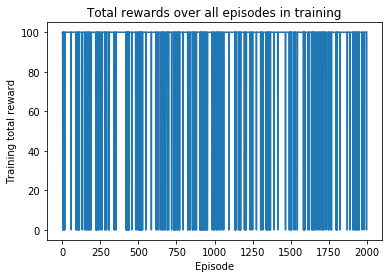

In [74]:
#Visualizing results and total reward over all episodes
x = range(train_episodes)
plot(x, training_rewards)
xlabel('Episode')
ylabel('Training total reward')
title('Total rewards over all episodes in training') 
show()

In [75]:
Q

{( .  .  . 
   .  .  . 
   .  .  . ,
  1): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( .  .  X 
   .  .  . 
   .  .  . ,
  2): {0: 0.0, 1: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( .  .  X 
   .  .  . 
   O  .  . ,
  1): {0: 0.0, 1: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 7: 0.0, 8: 0.0},
 ( .  X  X 
   .  .  . 
   O  .  . ,
  2): {0: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 7: 0.0, 8: 0.0},
 ( O  X  X 
   .  .  . 
   O  .  . ,
  1): {3: 0.0, 4: 0.0, 5: 0.0, 7: 0.0, 8: 0.0},
 ( O  X  X 
   .  .  . 
   O  X  . ,
  2): {3: 30.0, 4: 0.0, 5: 0.0, 8: 0.0},
 ( .  .  . 
   .  .  X 
   .  .  . ,
  2): {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( .  O  . 
   .  .  X 
   .  .  . ,
  1): {0: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( X  O  . 
   .  .  X 
   .  .  . ,
  2): {2: 0.0, 3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( X  O  O 
   .  .  X 
   .  .  . ,
  1): {3: 0.0, 4: 0.0, 6: 0.0, 7: 0.0, 8: 0.0},
 ( X  O  O 
   .  .  X 
   . 